# Setup

In [74]:
import pandas as pd
import functions
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
import matplotlib.pyplot as pyplot

# Dataset preparation

In [75]:
train_set = pd.read_csv("/home/joel/datasets/datasets_reais/water-quality/water-quality_train.csv")
train_set.sample(5)

25400-  29600-  30400-  33400-  17300-  19400-  34500-  38100-  49700-  \
74       0       0       0       0       1       0       0       0       0   
80       0       0       0       0       0       1       0       0       1   
45       0       0       0       0       1       0       1       1       1   
81       1       0       0       0       0       1       0       0       1   
42       0       0       0       0       1       1       0       0       0   

    50390-  ...  hardness       no2       no3       nh4       po4        cl  \
74       0  ...  2.482503  0.172734  0.951024  0.046409  0.063153  0.227729   
80       0  ...  2.915956  0.115156  1.288485  0.054847  0.126307  0.362295   
45       1  ...  3.388814  0.690938  1.871371  0.160321  0.421023  1.821829   
81       0  ...  2.206669  0.690938  1.012381  0.067504  0.126307  0.217377   
42       0  ...  4.807387  0.460625  0.000000  8.437948  1.936707  6.562724   

        sio2     kmno4   k2cr2o7       bod  
74  1.282146  0.256748  0.133891  0.177040  
80  1.282146  0.297287  0.310818  0.194744  
45  6.410728  1.432381  1.095037  0.185892  
81  1.801934  0.527008  0.387327  0.221300  
42  5.197887  2.513424  4.590547  3.514238  

[5 rows x 30 columns]

In [76]:
test_set = pd.read_csv("/home/joel/datasets/datasets_reais/water-quality/water-quality_test.csv")
test_set.sample(5)

25400-  29600-  30400-  33400-  17300-  19400-  34500-  38100-  49700-  \
583       1       1       1       0       1       0       1       0       0   
897       1       0       1       1       0       1       0       1       1   
106       0       0       1       0       0       0       0       1       0   
594       1       1       1       0       1       0       0       0       1   
891       1       0       0       0       1       0       0       0       0   

     50390-  ...  hardness       no2       no3       nh4       po4        cl  \
583       0  ...  3.625243  0.115156  0.858990  0.029533  0.042102  0.113864   
897       0  ...  3.940481  0.978829  0.736277  0.118131  0.021051  0.362295   
106       0  ...  2.167265  0.230313  0.674921  0.037971  0.021051  0.134567   
594       0  ...  4.373934  0.287891  1.227128  0.303766  0.189460  1.190399   
891       0  ...  4.058696  0.230313  0.828312  0.063285  0.105256  0.331242   

         sio2     kmno4   k2cr2o7       bod  
583  1.108883  0.229722  0.114764  0.150484  
897  1.212840  0.891860  0.779437  1.079942  
106  0.311873  0.270261  0.277346  0.097372  
594  1.628671  0.567547  0.588164  0.318671  
891  1.420756  0.351339  0.234309  0.150484  

[5 rows x 30 columns]

In [77]:
train_set_input, train_set_labels = functions.split_atributtes_labels(train_set,14)
print(train_set_input.columns)
print(train_set_labels.columns)

Index(['std_temp', 'std_pH', 'conduct', 'o2', 'o2sat', 'co2', 'hardness',
       'no2', 'no3', 'nh4', 'po4', 'cl', 'sio2', 'kmno4', 'k2cr2o7', 'bod'],
      dtype='object')
Index(['25400-', '29600-', '30400-', '33400-', '17300-', '19400-', '34500-',
       '38100-', '49700-', '50390-', '55800-', '57500-', '59300-', '37880-'],
      dtype='object')


In [78]:
train_set_input.head()

std_temp     std_pH   conduct        o2     o2sat       co2  hardness  \
0  0.662303  23.722053  2.973241  5.343706  4.446809  0.000000  3.546433   
1  2.025867  23.722053  3.298439  4.100984  4.072903  0.155396  3.388814   
2  3.253074  23.421773  2.740956  3.645319  4.157477  0.699283  2.955361   
3  3.759541  24.022332  2.657334  3.231078  3.877047  0.000000  3.034170   
4  1.928469  23.121494  2.332136  4.515224  4.429004  0.699283  3.112980   

        no2       no3       nh4       po4        cl      sio2     kmno4  \
0  0.403047  2.362222  0.232044  0.189460  1.459533  1.663324  1.026990   
1  0.345469  2.178153  0.210949  0.526279  1.739018  2.217765  0.837808   
2  0.460625  3.098499  0.097036  0.315767  0.776347  3.188038  0.851321   
3  6.966957  1.932727  0.147664  0.210512  0.817753  2.633596  0.918886   
4  0.633360  2.147475  0.189854  0.357870  1.076535  2.598944  0.851321   

    k2cr2o7       bod  
0  0.841600  0.203596  
1  0.712491  0.150484  
2  0.707709  0.247856  
3  0.736400  0.416043  
4  0.827255  0.345227

In [79]:
train_set_labels.head()

25400-  29600-  30400-  33400-  17300-  19400-  34500-  38100-  49700-  \
0       1       0       0       0       0       1       1       0       1   
1       0       1       0       1       1       1       1       0       1   
2       1       1       0       0       1       0       1       0       1   
3       1       1       0       0       1       1       1       1       1   
4       0       0       1       0       0       1       0       0       1   

   50390-  55800-  57500-  59300-  37880-  
0       1       1       1       1       1  
1       1       1       1       1       0  
2       1       1       0       1       1  
3       1       1       1       0       0  
4       0       0       1       0       1

In [80]:
test_set_input, test_set_labels = functions.split_atributtes_labels(test_set,14)
print(test_set_input.columns)
print(test_set_labels.columns)

Index(['std_temp', 'std_pH', 'conduct', 'o2', 'o2sat', 'co2', 'hardness',
       'no2', 'no3', 'nh4', 'po4', 'cl', 'sio2', 'kmno4', 'k2cr2o7', 'bod'],
      dtype='object')
Index(['25400-', '29600-', '30400-', '33400-', '17300-', '19400-', '34500-',
       '38100-', '49700-', '50390-', '55800-', '57500-', '59300-', '37880-'],
      dtype='object')


# Normalization

## Seen distribuition before scaling

In [81]:
train_set_input.describe()

std_temp      std_pH     conduct          o2       o2sat         co2  \
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000   
mean     2.209159   23.596221    2.653175    4.297452    4.241415    0.852829   
std      1.282915    0.951191    0.792249    1.290811    1.091368    1.739498   
min      0.506467   21.319819    1.653865    0.041424    0.048964    0.000000   
25%      1.012933   22.821215    2.025520    3.728167    4.046195    0.000000   
50%      2.006387   23.722053    2.527255    4.432376    4.446809    0.155396   
75%      3.369951   24.322611    3.010406    5.178010    4.731689    0.699283   
max      4.908831   25.523727    6.197349    7.124941    6.396460    8.896433   

         hardness         no2         no3         nh4         po4          cl  \
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000   
mean     3.222938    0.512171    1.850919    0.314977    0.265445    1.052875   
std      0.639755    0.864371    0.968876    0.957799    0.349515    0.932420   
min      1.930836    0.057578    0.000000    0.042190    0.021051    0.217377   
25%      2.915956    0.172734    1.196450    0.084379    0.084205    0.403701   
50%      3.152385    0.345469    1.748658    0.113912    0.168409    0.807401   
75%      3.625243    0.460625    2.423578    0.177197    0.315767    1.418128   
max      4.965006    6.966957    4.908513    8.437948    2.484037    6.562724   

             sio2       kmno4     k2cr2o7         bod  
count  105.000000  105.000000  105.000000  105.000000  
mean     2.443502    0.743732    0.644362    0.419753  
std      1.159310    0.569413    0.662722    0.657360  
min      0.138610    0.229722    0.119546    0.061964  
25%      1.663324    0.337826    0.301255    0.177040  
50%      2.183113    0.648626    0.468618    0.239004  
75%      2.980122    0.891860    0.736400    0.354079  
max      6.480033    4.013370    4.590547    4.186989

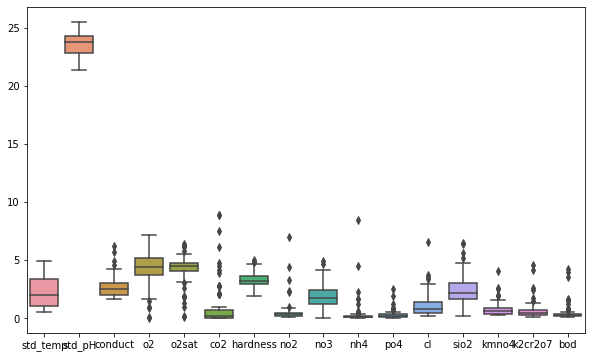

In [82]:
ax = sns.boxplot(data=train_set_input)
ax.figure.set_size_inches(10,6)

## Seen distribution after scaling

In [83]:
scaler = MinMaxScaler()
train_set_scalled = scaler.fit_transform(train_set_input)
train_set_scalled = pd.DataFrame(data=train_set_scalled, columns=train_set_input.columns)
train_set_scalled.describe()

std_temp      std_pH     conduct          o2       o2sat         co2  \
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000   
mean     0.386768    0.541497    0.219944    0.600835    0.660489    0.095862   
std      0.291415    0.226263    0.174370    0.182227    0.171937    0.195528   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.115044    0.357143    0.081800    0.520468    0.629734    0.000000   
50%      0.340708    0.571429    0.192229    0.619883    0.692847    0.017467   
75%      0.650442    0.714286    0.298568    0.725146    0.737728    0.078603   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         hardness         no2         no3         nh4         po4          cl  \
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000   
mean     0.425850    0.065794    0.377083    0.032491    0.099227    0.131671   
std      0.210850    0.125101    0.197387    0.114081    0.141907    0.146946   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.324675    0.016667    0.243750    0.005025    0.025641    0.029364   
50%      0.402597    0.041667    0.356250    0.008543    0.059829    0.092985   
75%      0.558442    0.058333    0.493750    0.016080    0.119658    0.189233   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             sio2       kmno4     k2cr2o7         bod  
count  105.000000  105.000000  105.000000  105.000000  
mean     0.363466    0.135850    0.117382    0.086736  
std      0.182815    0.150493    0.148227    0.159359  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.240437    0.028571    0.040642    0.027897  
50%      0.322404    0.110714    0.078075    0.042919  
75%      0.448087    0.175000    0.137968    0.070815  
max      1.000000    1.000000    1.000000    1.000000

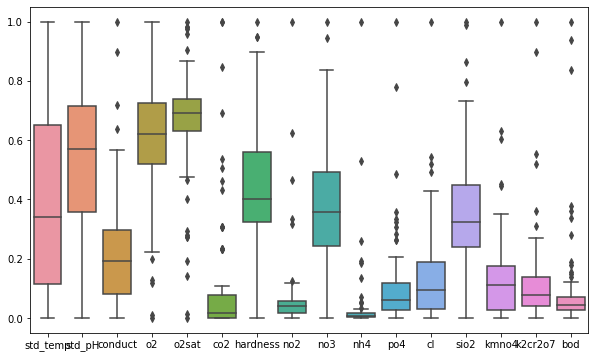

In [84]:
ax = sns.boxplot(data=train_set_scalled)
ax.figure.set_size_inches(10,6)

In [85]:
test_set_input_scalled = scaler.transform(test_set_input)
test_set_input_scalled = pd.DataFrame(data=test_set_input_scalled, columns=test_set_input.columns)
test_set_input_scalled.describe()

std_temp      std_pH     conduct          o2       o2sat         co2  \
count  955.000000  955.000000  955.000000  955.000000  955.000000  955.000000   
mean     0.451114    0.693044    0.322738    0.612265    0.707366    0.039082   
std      0.233734    0.225374    0.231339    0.143312    0.159616    0.098968   
min     -0.101770   -0.071429   -0.151329    0.017544    0.021038    0.000000   
25%      0.272124    0.571429    0.177914    0.549708    0.646914    0.000000   
50%      0.433628    0.714286    0.294479    0.631579    0.713184    0.000000   
75%      0.612832    0.857143    0.431493    0.695906    0.779102    0.030568   
max      1.101770    1.571429    2.370143    1.192983    1.659187    1.074236   

         hardness         no2         no3         nh4         po4          cl  \
count  955.000000  955.000000  955.000000  955.000000  955.000000  955.000000   
mean     0.722703    0.057897    0.313508    0.025949    0.112391    0.053147   
std      0.347038    0.139965    0.215302    0.102740    0.314481    0.091973   
min     -0.077922   -0.008333    0.006250   -0.003518   -0.008547   -0.024470   
25%      0.493507    0.000000    0.181250    0.000503    0.008547    0.001631   
50%      0.701299    0.016667    0.268750    0.005025    0.034188    0.019576   
75%      0.922078    0.050000    0.406250    0.011558    0.094017    0.073410   
max      2.636364    1.258333    3.831250    2.030151    4.991453    0.903752   

             sio2       kmno4     k2cr2o7         bod  
count  955.000000  955.000000  955.000000  955.000000  
mean     0.149841    0.088369    0.092573    0.067865  
std      0.130625    0.238284    0.169763    0.128494  
min     -0.010929   -0.057143   -0.012834   -0.010730  
25%      0.065574    0.003571    0.016043    0.012876  
50%      0.109290    0.028571    0.047059    0.027897  
75%      0.191257    0.089286    0.112299    0.070815  
max      1.021858    4.989287    3.320856    1.701717

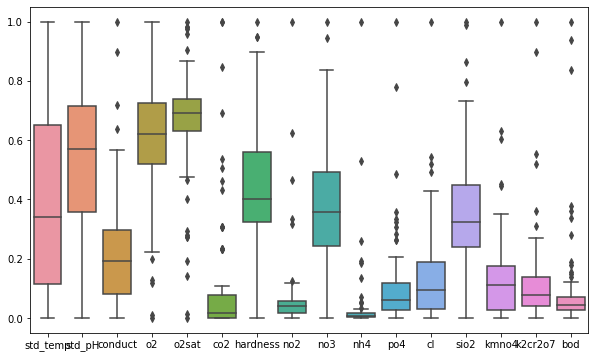

In [86]:
ax = sns.boxplot(data=train_set_scalled)
ax.figure.set_size_inches(10,6)

In [87]:
train_set_final = pd.merge(train_set_labels, train_set_scalled,how='left',left_index=True,right_index=True)

test_set_final = pd.merge(test_set_labels, test_set_input_scalled,how='left',left_index=True,right_index=True)


In [100]:
for i in train_set_final.columns[:14]:
    train_set_final[i] = train_set_final[i].astype("int64")

for i in test_set_final.columns[:14]:
    test_set_final[i] = test_set_final[i].astype("int64")

In [101]:
import arff

In [102]:
arff.dump("/home/joel/datasets/datasets_reais/water-quality/water-quality_scaled_train.arff",
train_set_final.values,
relation="'water-quality: -C 14'",
names=train_set_final.columns)

In [103]:
arff.dump("/home/joel/datasets/datasets_reais/water-quality/water-quality_scaled_test.arff",
test_set_final.values,
relation="'water-quality: -C 14'",
names=train_set_final.columns)